# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.


1. Limpiar y revisar datos.
2. Orgnizar los DataFrames y unirlos para mejor comprension.
3. Descartar informacion no necesaria.
4. Graficar.
5. Analizar y comparar datos para porbar hipotesis.


## Inicialización

In [1]:
# Carga de librerias:

# Manipulacion de datos:
import pandas as pd
import numpy as np

# Graficas
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# la siguiente línea proporciona gráficos de mejor calidad en pantallas HiDPI
%config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn-v0_8-dark-palette')

# Matimatica:
import math

# Estadistica:
from scipy import stats as st

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
df_calls = pd.read_csv('/home/andres/anaconda_projects/TripleTen/Sprint 5/megaline_calls.csv')
df_internet = pd.read_csv('/home/andres/anaconda_projects/TripleTen/Sprint 5/megaline_internet.csv')
df_messages =  pd.read_csv('/home/andres/anaconda_projects/TripleTen/Sprint 5/megaline_messages.csv')
df_plans = pd.read_csv('/home/andres/anaconda_projects/TripleTen/Sprint 5/megaline_plans.csv')
df_users = pd.read_csv('/home/andres/anaconda_projects/TripleTen/Sprint 5/megaline_users.csv')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Informacion general de Tarifas:
print(df_plans.info())
display(df_plans.describe())

print()
print('-'*100)
# Informacion total de tabla "Tarifas"
display(df_plans.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes
None


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000



----------------------------------------------------------------------------------------------------


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Corregir datos y Enriquecer los datos

<div class="alert alert-block alert-info">
<b>Nuestra matriz de tarifas es optima y no requiere manipulacion de datos adicional.</b> <a class=“tocSkip”></a>
</div>

## Usuarios/as

In [4]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
print(df_users.info())

print()
print('-'*100)
# Imprime una muestra de datos para usuarios
display(df_users.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None

----------------------------------------------------------------------------------------------------


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


## Corregir los datos

In [5]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], errors = 'coerce', format = '%Y-%m-%d')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], errors = 'coerce', format = '%Y-%m-%d')
print(df_users.dtypes)

user_id                int64
first_name            object
last_name             object
age                    int64
city                  object
reg_date      datetime64[ns]
plan                  object
churn_date    datetime64[ns]
dtype: object


<div class="alert alert-block alert-info">
<b>
Se cambio la variable fecha de (object) a (datetime).

    
Algunos elementos cambiaron de NaN a Not A Time.
</b> <a class=“tocSkip”></a>
</div>

## Llamadas

In [6]:
# Informacion general de el dataframe de llamadas:
print(df_calls.info())
display(df_calls.describe())
print()
print('-'*100)

# Imprime una muestra de datos para las llamadas
display(df_calls.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000



----------------------------------------------------------------------------------------------------


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


## Corregir los datos

## Enriquecer los datos

In [7]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format = '%Y-%m-%d', errors = 'coerce')
df_calls['duration'] = np.ceil(df_calls['duration'])
df_calls = df_calls.rename(columns = {'id':'call_id'})
display(df_calls.head(1))
print(df_calls.dtypes)

,call_id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9.0


call_id              object
user_id               int64
call_date    datetime64[ns]
duration            float64
dtype: object


<div class="alert alert-block alert-info">
<b>
Se redondeo la duracion de llamadas para cumplir con el criterio de cargo mensual.

Se cambio el tipo de dato (object) para la variable call-date a (datetime).
</b> <a class=“tocSkip”></a>
</div>

## Mensajes

In [8]:
# Informacion general tabla de mensajes:
print(df_messages.info())
display(df_messages.describe())
print()
print('-'*100)
# Primeras filas:
display(df_messages.head(1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000



----------------------------------------------------------------------------------------------------


,id,user_id,message_date
0,1000_125,1000,2018-12-27


## Corregir los datos

## Enriquecer los datos

In [9]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], errors = 'coerce', format = '%Y-%m-%d')
display(df_messages.head(1))
df_messages = df_messages.rename(columns = {'id':'message_id'})
print(df_messages.dtypes)

,id,user_id,message_date
0,1000_125,1000,2018-12-27


message_id              object
user_id                  int64
message_date    datetime64[ns]
dtype: object


<div class="alert alert-block alert-info">
<b>
Nuevamente cambiar de (object) a datetime.

Cambiar el nombre id por message_id.
</b> <a class=“tocSkip”></a>
</div>

## Internet

In [10]:
# Imprime la información general/resumida sobre el DataFrame de internet
print(df_internet.info())
display(df_internet.describe())
print()
print('-'*100)
# Imprime una muestra de datos para el tráfico de internet
display(df_internet.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000



----------------------------------------------------------------------------------------------------


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


## Corregir los datos

## Enriquecer los datos

In [11]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], errors = 'coerce', format = '%Y-%m-%d')
display(df_internet.head(1))
df_internet = df_internet.rename(columns = {'id':'session_id'})
print(df_internet.dtypes)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86


session_id              object
user_id                  int64
session_date    datetime64[ns]
mb_used                float64
dtype: object


<div class="alert alert-block alert-info">
<b>
Cambiar dato (object) a datetime.

Cambiar nombre id por session_id.
</b> <a class=“tocSkip”></a>
</div>

## Agregar datos por usuario

- *Se calcula el total de llamadas hechas por usuario mensualmente.*
- *Tambien el total de minutos usados.*
- *Asi mismo el total de mensajes.*

In [12]:
# Total de llamdas por usuario (Mensual):
display(df_calls.head(1))
df_calls['month'] = df_calls['call_date'].dt.to_period('M')
llamadas_X_mes = df_calls.groupby(by = ['month','user_id'])['call_id'].count().reset_index()
llamadas_X_mes = llamadas_X_mes.rename(columns = {'call_id':'total_calls'})
display(llamadas_X_mes.sort_values(by = ['month','total_calls'], ascending = False).head(5))

,call_id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9.0


,month,user_id,total_calls
2043,2018-12,1267,205
2098,2018-12,1329,191
2132,2018-12,1365,180
1845,2018-12,1052,177
2148,2018-12,1382,170


In [13]:
# Total de minutos por usuario (Mensual):
duracion_X_mes = df_calls.groupby(by = ['month','user_id'])['duration'].sum().reset_index()
display(duracion_X_mes.sort_values(by = ['month', 'duration'], ascending = False).head(5))

,month,user_id,duration
2043,2018-12,1267,1510.0
2098,2018-12,1329,1369.0
2132,2018-12,1365,1357.0
2148,2018-12,1382,1295.0
1845,2018-12,1052,1200.0


In [14]:
# Total de mensajes por usuario (Mensual):
display(df_messages.head(1))
df_messages['month'] = df_messages['message_date'].dt.to_period('M')
mensaje_X_mes = df_messages.groupby(by = ['month','user_id'])['message_id'].count().reset_index()
mensaje_X_mes = mensaje_X_mes.rename(columns = {'message_id':'total_messages'})
display(mensaje_X_mes.sort_values(by = ['month', 'total_messages'], ascending = False).head())

,message_id,user_id,message_date
0,1000_125,1000,2018-12-27


,month,user_id,total_messages
1462,2018-12,1052,266
1676,2018-12,1328,168
1719,2018-12,1381,157
1787,2018-12,1470,153
1528,2018-12,1132,150


In [15]:
# MB usados por usuario (Mensual):
display(df_internet.head(1))
df_internet['month'] = df_internet['session_date'].dt.to_period('M')
trafico_X_mes = df_internet.groupby(by = ['month','user_id'])['mb_used'].sum().reset_index()
display(trafico_X_mes.sort_values(by = ['month','mb_used'], ascending = False).head())

,session_id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86


,month,user_id,mb_used
2165,2018-12,1379,70931.59
1923,2018-12,1121,66863.89
2085,2018-12,1292,52034.66
2267,2018-12,1490,46215.51
1842,2018-12,1038,45020.31


## Fusion de DataFrames
- (Mas la fusion de la tabla de tarifas)

In [16]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
df_fusion = llamadas_X_mes.merge(
    duracion_X_mes, on = ['user_id','month'], how = 'right').merge(
    mensaje_X_mes, on = ['user_id','month'], how = 'right').merge(
    trafico_X_mes, on = ['user_id','month'], how = 'right')

df_fusion['total_calls'] = df_fusion['total_calls'].fillna(0)
df_fusion['duration'] = df_fusion['duration'].fillna(0)
df_fusion['total_messages'] = df_fusion['total_messages'].fillna(0)
df_fusion['mb_used'] = df_fusion['mb_used'].fillna(0)
df_fusion_2 = df_users.merge(df_fusion, on = 'user_id', how = 'right')
display(df_fusion_2.head(1))

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,total_calls,duration,total_messages,mb_used
0,1042,Clementina,Mclaughlin,40,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-01-15,surf,NaT,2018-01,0.0,0.0,0.0,1854.93


In [17]:
# Fusion con tabla de tarifas:
df_fusion_2 = df_fusion_2.rename(columns = {'plan':'plan_name'})
df_total = df_fusion_2.merge(df_plans, on = 'plan_name', how = 'right')
display(df_total.head(1))

,user_id,first_name,last_name,age,city,reg_date,plan_name,churn_date,month,total_calls,duration,total_messages,mb_used,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1042,Clementina,Mclaughlin,40,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-01-15,surf,NaT,2018-01,0.0,0.0,0.0,1854.93,50,15360,500,20,10,0.03,0.03


In [18]:
# Calculo del Ingreso mensual a la empresa por usuario
df_bill = df_total[['user_id','plan_name','month','total_calls','duration','total_messages','mb_used','messages_included','mb_per_month_included','minutes_included','usd_monthly_pay','usd_per_gb','usd_per_message','usd_per_minute']]
df_bill = df_bill.rename(columns = {'total_calls':'used_calls'})
df_bill = df_bill.rename(columns = {'total_messages':'used_messages'})
df_bill = df_bill.rename(columns = {'plan_name':'plan'})
df_bill = df_bill.rename(columns = {'mb_used':'used_mb'})
df_bill = df_bill.rename(columns = {'duration':'used_minutes'})
df_bill = df_bill.rename(columns = {'messages_included':'free_messages'})
df_bill = df_bill.rename(columns = {'mb_per_month_included':'free_mb'})
df_bill = df_bill.rename(columns = {'minutes_included':'free_minutes'})

df_bill['min_extra_cost_usd'] = np.where(df_bill['used_minutes'] > df_bill['free_minutes'], (df_bill['used_minutes'] - df_bill['free_minutes']) * df_bill['usd_per_minute'], 0)
df_bill['mess_extra_cost_usd'] = np.where(df_bill['used_messages'] > df_bill['free_messages'], (df_bill['used_messages'] - df_bill['free_messages']) * df_bill['usd_per_message'], 0)
df_bill['extra_gb'] = np.where(df_bill['used_mb'] > df_bill['free_mb'], (df_bill['used_mb'] - df_bill['free_mb'])/1024, 0)
df_bill['extra_gb'] = np.ceil(df_bill['extra_gb'])
df_bill['gb_extra_cost_usd'] = df_bill['extra_gb'] * df_bill['usd_per_gb']
df_bill['total_usd'] = df_bill['usd_monthly_pay'] + df_bill['min_extra_cost_usd'] + df_bill['mess_extra_cost_usd'] + df_bill['gb_extra_cost_usd']
df_bill = df_bill.sort_values(by='total_usd',ascending=False).reset_index(drop=True)
display(df_bill.head(5))

df_bill.to_csv('sprint_5_data_limpia.csv',index=False)

,user_id,plan,month,used_calls,used_minutes,used_messages,used_mb,free_messages,free_mb,free_minutes,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,min_extra_cost_usd,mess_extra_cost_usd,extra_gb,gb_extra_cost_usd,total_usd
0,1379,surf,2018-12,144.0,1103.0,126.0,70931.59,50,15360,500,20,10,0.03,0.03,18.09,2.28,55.0,550.0,590.37
1,1121,surf,2018-12,0.0,0.0,97.0,66863.89,50,15360,500,20,10,0.03,0.03,0.00,1.41,51.0,510.0,531.41
2,1292,surf,2018-12,0.0,0.0,0.0,52034.66,50,15360,500,20,10,0.03,0.03,0.00,0.00,36.0,360.0,380.00
3,1292,surf,2018-08,0.0,0.0,0.0,51809.35,50,15360,500,20,10,0.03,0.03,0.00,0.00,36.0,360.0,380.00
4,1240,surf,2018-08,161.0,1095.0,15.0,49950.58,50,15360,500,20,10,0.03,0.03,17.85,0.00,34.0,340.0,377.85


## Estudia el comportamiento de usuario

### Llamadas

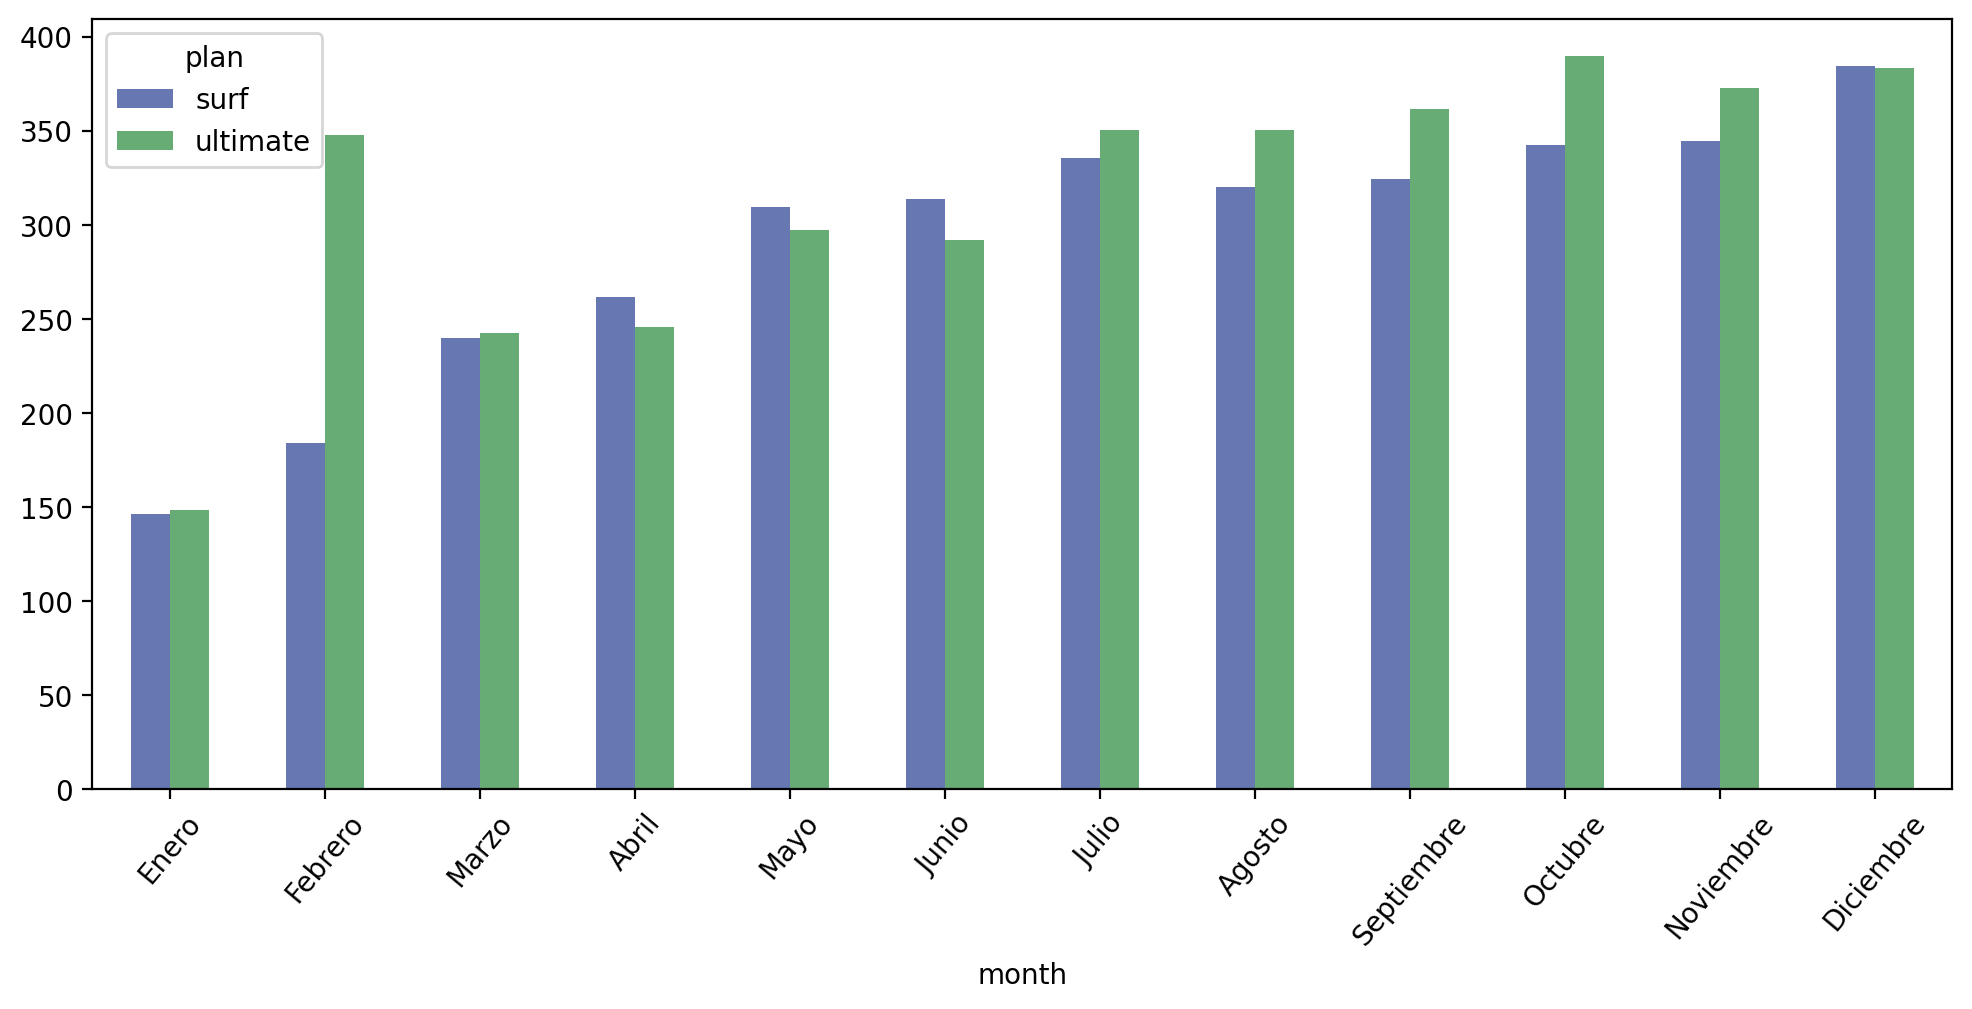

Dado que parece que las medias se mantienen constantes a lo largo del año
Hare un T-test para determinar si hay realmente un aumento significativo para febrero:
La hipotesis nula es: La media no es significativamente mayor entre el plan surf y ultimate para el mes de febrero
Resultado T-test para febrero (planes: surf, ultimate), p-value: 0.3045056011739701
No podemos rechazar la hipotesis nula.


In [19]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
pivot_1 = df_bill.pivot_table(
    index = 'month',
    columns = 'plan',
    values = 'used_minutes',
    aggfunc = 'mean'
)
nombres_mes = month_names_map = {
    pd.Period('2018-01', freq='M'): 'Enero',
    pd.Period('2018-02', freq='M'): 'Febrero',
    pd.Period('2018-03', freq='M'): 'Marzo',
    pd.Period('2018-04', freq='M'): 'Abril',
    pd.Period('2018-05', freq='M'): 'Mayo',
    pd.Period('2018-06', freq='M'): 'Junio',
    pd.Period('2018-07', freq='M'): 'Julio',
    pd.Period('2018-08', freq='M'): 'Agosto',
    pd.Period('2018-09', freq='M'): 'Septiembre',
    pd.Period('2018-10', freq='M'): 'Octubre',
    pd.Period('2018-11', freq='M'): 'Noviembre',
    pd.Period('2018-12', freq='M'): 'Diciembre',
}
pivot_1 = pivot_1.rename(index = nombres_mes)
pivot_1.plot(
    kind = 'bar',
    figsize = [12,5],
    rot = 50,
    alpha = 0.6
)
plt.show()
plan_surf_febrero = df_bill[(df_bill['month'] == pd.Period('2018-02', freq = 'M')) & (df_bill['plan'] == 'surf')]['used_minutes']
plan_ultimate_febrero = df_bill[(df_bill['month'] == pd.Period('2018-02', freq = 'M')) & (df_bill['plan'] == 'ultimate')]['used_minutes']
print('Dado que parece que las medias se mantienen constantes a lo largo del año')
print('Hare un T-test para determinar si hay realmente un aumento significativo para febrero:')
print('La hipotesis nula es: La media no es significativamente mayor entre el plan surf y ultimate para el mes de febrero')
test_medias_febrero = st.ttest_ind(plan_surf_febrero, plan_ultimate_febrero, equal_var = False)
print(f'Resultado T-test para febrero (planes: surf, ultimate), p-value: {test_medias_febrero.pvalue}')
if test_medias_febrero.pvalue < 0.05:
    print('La diferencia es significativa, rechazamos hipotesis nula.')
else:
    print('No podemos rechazar la hipotesis nula.')

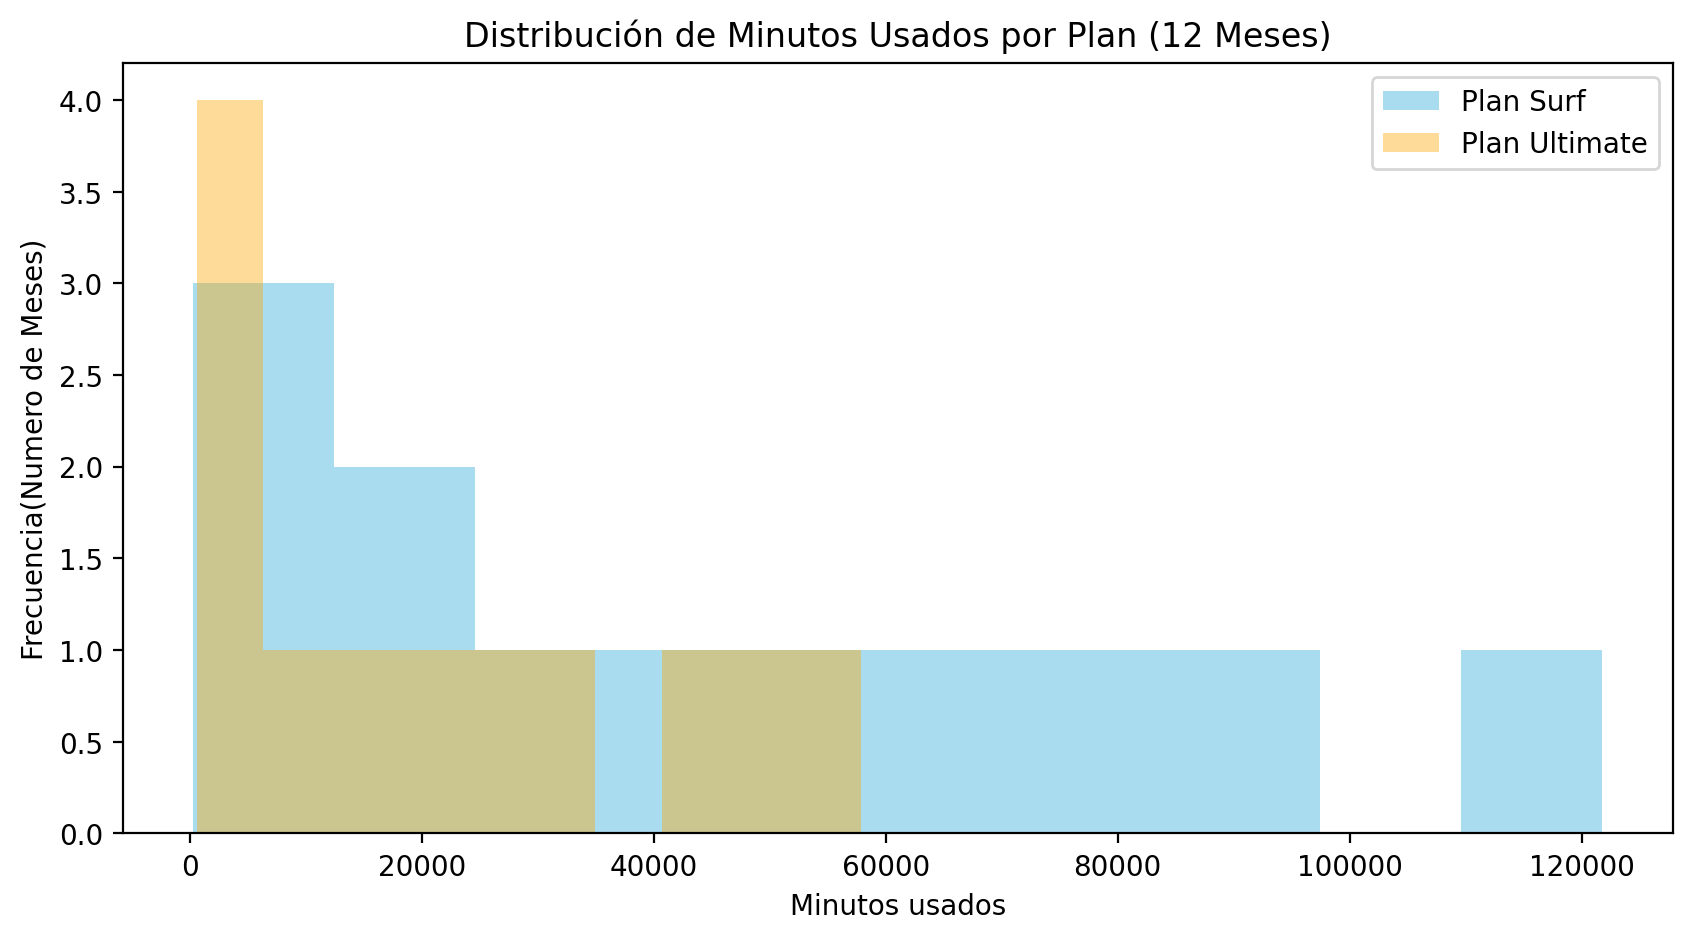

In [20]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
pivot_2 = df_bill.pivot_table(
    index = 'month',
    columns = 'plan',
    values = 'used_minutes',
    aggfunc = 'sum'
)
# Los bins los ajuste primero, revisando cada histograma a manera de densidad.
# print(pivot_2.head(1))
plt.figure(figsize = [10,5])
plt.hist(pivot_2['surf'], alpha = 0.7, bins = 10, label = 'Plan Surf', color = 'skyblue')
plt.hist(pivot_2['ultimate'], alpha = 0.4, bins = 10, label = 'Plan Ultimate', color = 'orange')
plt.xlabel('Minutos usados',fontsize=10)
plt.ylabel('Frecuencia(Numero de Meses)',fontsize=10)
plt.title('Distribución de Minutos Usados por Plan (12 Meses)')
plt.legend()
plt.show()

In [21]:
# Calcula la media y la varianza de la duración mensual de llamadas.
mean_surf = pivot_2['surf'].mean()
var_surf = pivot_2['surf'].var()
mean_ultimate = pivot_2['ultimate'].mean()
var_ultimate = pivot_2['ultimate'].var()

print(f"\nPlan Surf - Media de minutos: {mean_surf:.2f}, Varianza de minutos: {var_surf:.2f}")
print(f"Plan Ultimate - Media de minutos: {mean_ultimate:.2f}, Varianza de minutos: {var_ultimate:.2f}")
print('Aparentemente hay una brecha entre las medias y las varianzas de ambas pruebas.')
print('Hipotesis nula: No hay un consumo de minutos mayor en el plan "Surf" con respecto al plan "Ultimate".')
prueba = st.mannwhitneyu(pivot_2['surf'], pivot_2['ultimate'], alternative = 'greater')
print(f'El valor-p de la prueba es: {prueba.pvalue}')
if prueba.pvalue < 0.05:
    print('Rechazamos la hipotesis nula, si consume mas minutos plan "Surf".')
else:
    print('No rechazamos la hipotesis nula.')


Plan Surf - Media de minutos: 43834.58, Varianza de minutos: 1574866753.72
Plan Ultimate - Media de minutos: 21351.25, Varianza de minutos: 373966687.30
Aparentemente hay una brecha entre las medias y las varianzas de ambas pruebas.
Hipotesis nula: No hay un consumo de minutos mayor en el plan "Surf" con respecto al plan "Ultimate".
El valor-p de la prueba es: 0.11829204666093807
No rechazamos la hipotesis nula.


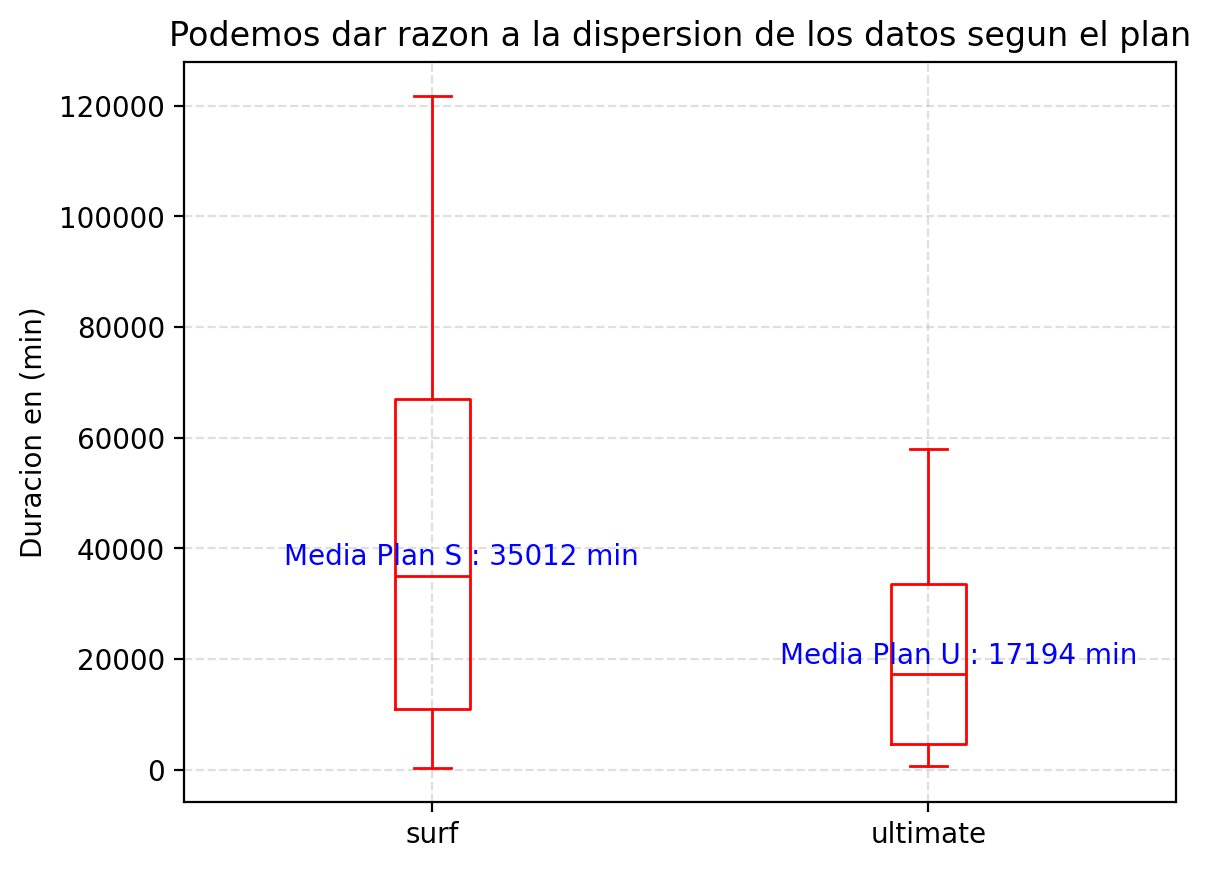

Los extremos del bigote para "Surf" confirman aun mas porque la brecha de media y varianza nos hicieron pensar que habia una diferencia estadistica entre ambos


In [28]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
pivot_2.plot(
    kind = 'box',
    color='red',
    showbox=True,
    showfliers=True
)
plt.title('Podemos dar razon a la dispersion de los datos segun el plan')
plt.ylabel('Duracion en (min)')
plt.annotate(f'Media Plan S : {pivot_2['surf'].median():.0f} min', xy=(0.7,pivot_2['surf'].median()+2000),color='blue')
plt.annotate(f'Media Plan U : {pivot_2['ultimate'].median():.0f} min', xy=(1.7,pivot_2['ultimate'].median()+2000),color='blue')
plt.grid(linestyle='--',alpha=0.4)
plt.show()
print('Los extremos del bigote para "Surf" confirman aun mas porque la brecha de media y varianza nos hicieron pensar que habia una diferencia estadistica entre ambos')

<div class="alert alert-block alert-info">
<b>
    
- Conclusion: Hay valores extremos para los usuarios del plan 'surf' lo cual altera la media.

- Conclusion: No existe diferencia entre uso de planes segun la comparacion de medianas con rango critico del 5%.

- Conclusion: Los usuario del plan 'surf' ocupan gran cantidad de minutos sin emabrgo la diferencia con respecto a los usuarios de 'ultimate' no justifica afirmar una diferencia estadistica.
</b> <a class=“tocSkip”></a>
</div>




### Mensajes

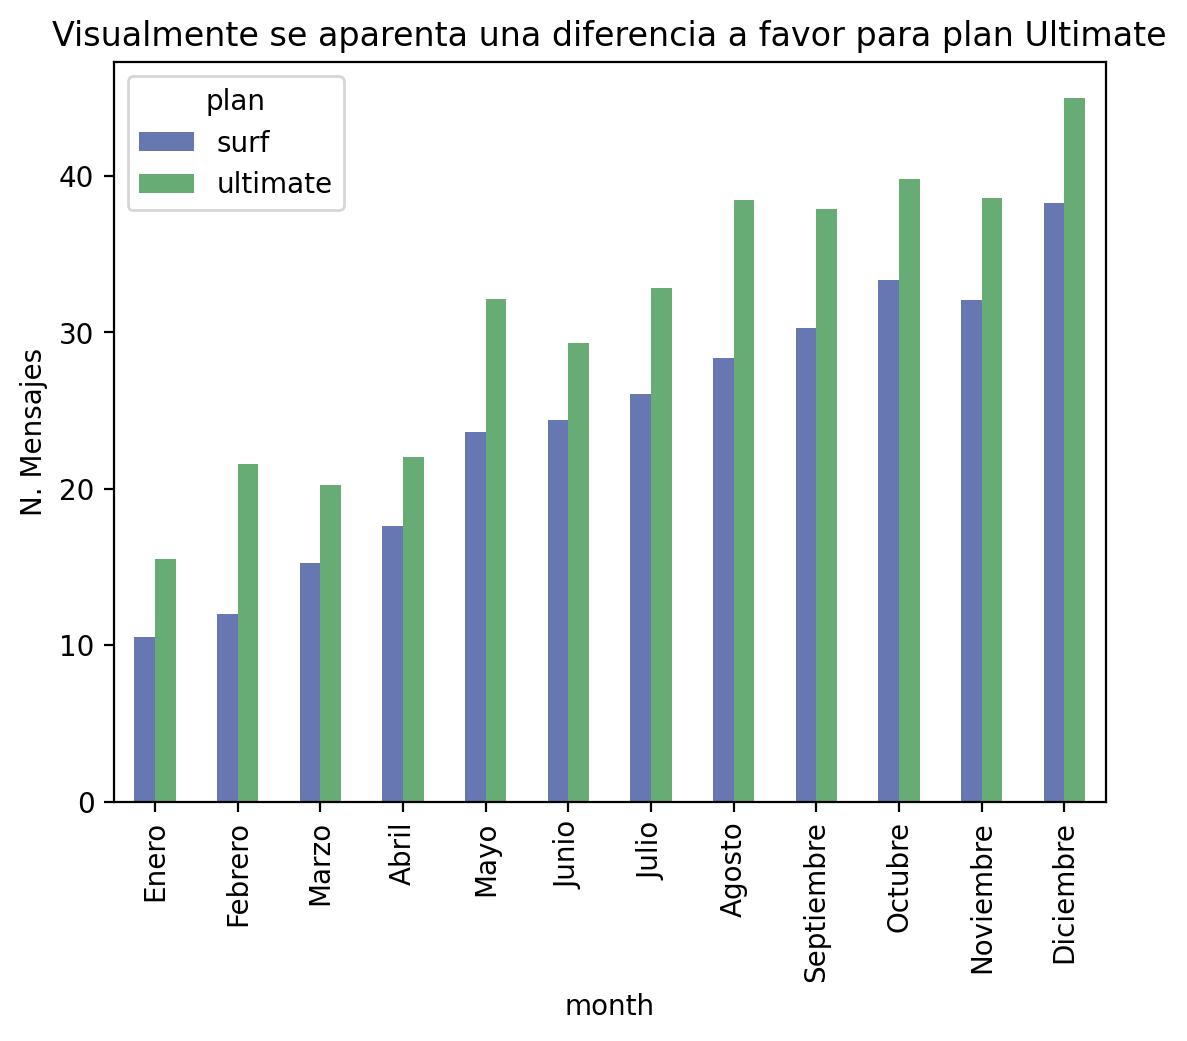

In [29]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
pivot_3 = df_bill.pivot_table(
    index = 'month',
    columns = 'plan',
    values = 'used_messages',
    aggfunc = 'mean'
)
nombres_mes = month_names_map = {pd.Period('2018-01', freq='M'): 'Enero',pd.Period('2018-02', freq='M'): 'Febrero',pd.Period('2018-03', freq='M'): 'Marzo',pd.Period('2018-04', freq='M'): 'Abril',
    pd.Period('2018-05', freq='M'): 'Mayo',
    pd.Period('2018-06', freq='M'): 'Junio',
    pd.Period('2018-07', freq='M'): 'Julio',
    pd.Period('2018-08', freq='M'): 'Agosto',
    pd.Period('2018-09', freq='M'): 'Septiembre',
    pd.Period('2018-10', freq='M'): 'Octubre',
    pd.Period('2018-11', freq='M'): 'Noviembre',
    pd.Period('2018-12', freq='M'): 'Diciembre',
}
pivot_3 = pivot_3.rename(index = nombres_mes)

pivot_3.plot(kind = 'bar', alpha = 0.6)
plt.title('Visualmente se aparenta una diferencia a favor para plan Ultimate')
plt.ylabel('N. Mensajes')
plt.show()

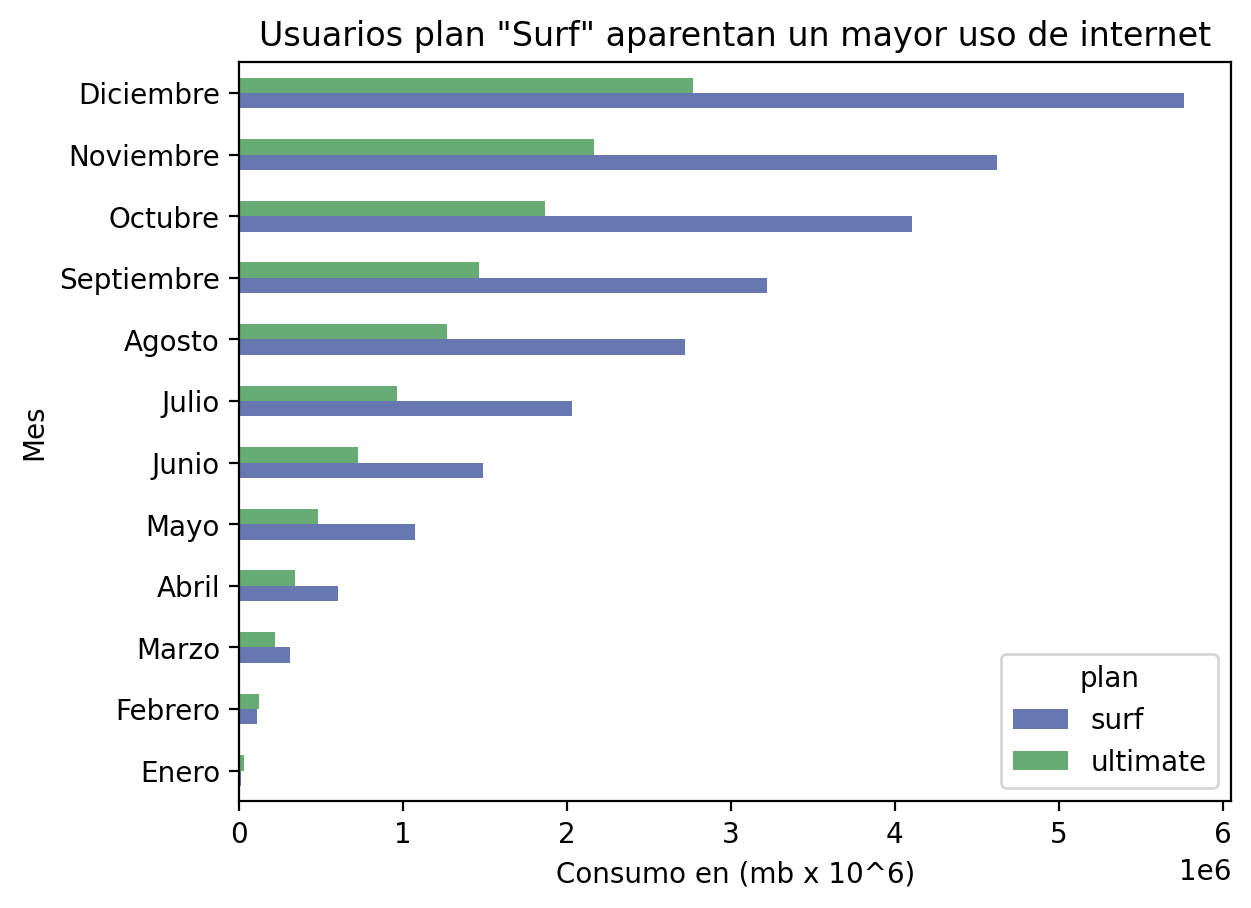

In [30]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
pivot_4 = df_bill.pivot_table(
    index = 'month',
    columns = 'plan',
    values = 'used_mb',
    aggfunc = 'sum'
)
nombres_mes = month_names_map = {pd.Period('2018-01', freq='M'): 'Enero',pd.Period('2018-02', freq='M'): 'Febrero',pd.Period('2018-03', freq='M'): 'Marzo',pd.Period('2018-04', freq='M'): 'Abril',
    pd.Period('2018-05', freq='M'): 'Mayo',
    pd.Period('2018-06', freq='M'): 'Junio',
    pd.Period('2018-07', freq='M'): 'Julio',
    pd.Period('2018-08', freq='M'): 'Agosto',
    pd.Period('2018-09', freq='M'): 'Septiembre',
    pd.Period('2018-10', freq='M'): 'Octubre',
    pd.Period('2018-11', freq='M'): 'Noviembre',
    pd.Period('2018-12', freq='M'): 'Diciembre',
}
pivot_4 = pivot_4.rename(index = nombres_mes)
pivot_4.plot(
    kind = 'barh',
    alpha = 0.6
)
plt.title('Usuarios plan "Surf" aparentan un mayor uso de internet')
plt.ylabel('Mes')
plt.xlabel('Consumo en (mb x 10^6)')
plt.show()

In [31]:
# Aqui las indagaciones sobre los mensajes
media_surf_mess = pivot_3['surf'].mean()
var_surf_mess = pivot_3['surf'].var()

media_ultimate_mess = pivot_3['ultimate'].mean()
var_ultimate_mess = pivot_3['ultimate'].var()

print(f'La media de mensajes para usuarios "Surf(2018)" es: {media_surf_mess:.2f} y la varianza: {var_surf_mess:.2f}')
print(f'La media de mensajes para usuarios "Ultimate(2018)" es: {media_ultimate_mess:.2f} y la varianza: {var_ultimate_mess:.2f}')
print('Existe diferencia de comportamiento entre usuarios segun el plan telefonico?')
print('Hipotesis nula: No hay diferencia entre el comportamiento de los usuarios con respecto al plan.')
prueba_mess = st.ttest_ind(pivot_3['surf'], pivot_3['ultimate'], equal_var = False) # <-A pesar de que las varianzas son cercanas ocupare un parametro False para que la evaluacion se mas precisa respecto a los comportamientos.
print(f'valor-p de la prueba: {prueba_mess.pvalue}')
if prueba_mess.pvalue < 0.05:
    print('Rechazamos hipotesis nula, si hay diferencias')
else:
    print('No podemos rechazar la hipotesis nula')

La media de mensajes para usuarios "Surf(2018)" es: 24.32 y la varianza: 78.20
La media de mensajes para usuarios "Ultimate(2018)" es: 31.12 y la varianza: 87.91
Existe diferencia de comportamiento entre usuarios segun el plan telefonico?
Hipotesis nula: No hay diferencia entre el comportamiento de los usuarios con respecto al plan.
valor-p de la prueba: 0.08111306178952951
No podemos rechazar la hipotesis nula


<div class="alert alert-block alert-info">
<b>
    
- Conclusion: El uso de mensajes para ambos planes se mantiene bastante similar en las graficas.

- Conclusion: La diferencia mas notoria se da con el plan "ultimate" con respecto al plan "surf".

- La prueba de diferencia con umbral critico del 5% demuestra que no hay una diferencia estadistica para el comportamiento de usuario segun el plan.

- Los usuarios de ambos planes ocupan de media la misma cantidad de mensajes.
</b> <a class=“tocSkip”></a>
</div>

### Internet

In [32]:
media_surf_inter = pivot_4['surf'].mean()
var_surf_inter = pivot_4['surf'].var()

media_ultimate_inter = pivot_4['ultimate'].mean()
var_ultimate_inter = pivot_4['ultimate'].var()

print(f'La media de uso de internet para usuarios del plan "Surf" es: {media_surf_inter:.0f} y la varianza {var_surf_inter:.0f}')
print(f'La media de uso de internet para usuarios del plan "Ultimate" es: {media_ultimate_inter:.0f} y la varianza {var_ultimate_inter:.0f}')
plt.show()

La media de uso de internet para usuarios del plan "Surf" es: 2170515 y la varianza 3694207227737
La media de uso de internet para usuarios del plan "Ultimate" es: 1032882 y la varianza 782555633252


In [33]:
print('Aparentemente el uso medio de internet es el doble para los usuario del plan "Surf"')
print('Hipotesis nula: Los usuarios del plan "Surf" no consumen mas internet que los usuarios del plan "Ultimate"')

Aparentemente el uso medio de internet es el doble para los usuario del plan "Surf"
Hipotesis nula: Los usuarios del plan "Surf" no consumen mas internet que los usuarios del plan "Ultimate"


In [34]:
prueba_inter = st.mannwhitneyu(pivot_4['surf'], pivot_4['ultimate'], alternative = 'greater')
print(f'El valor-p de la prueba: {prueba_inter.pvalue}')
if prueba_inter.pvalue < 0.05:
    print('Rechazamos la hipoesis nula, en efecto hay un aumento en el uso de internet para usuarios "Surf".')
else:
    print("No podemos rechazar la hipotesis nula")

El valor-p de la prueba: 0.10724690389175873
No podemos rechazar la hipotesis nula


<div class="alert alert-block alert-info">
<b>
    
- Conclusion: Los usuario de plan 'surf' consumen gran cantidad de internet segun la grafica.

- Conclusion: A pesar de lo anterior,estadisticamente no podemos que los usuarios de 'surf' consumen mas internet que los usuarios de 'ultimate'.
</b> <a class=“tocSkip”></a>
</div>

## Ingreso

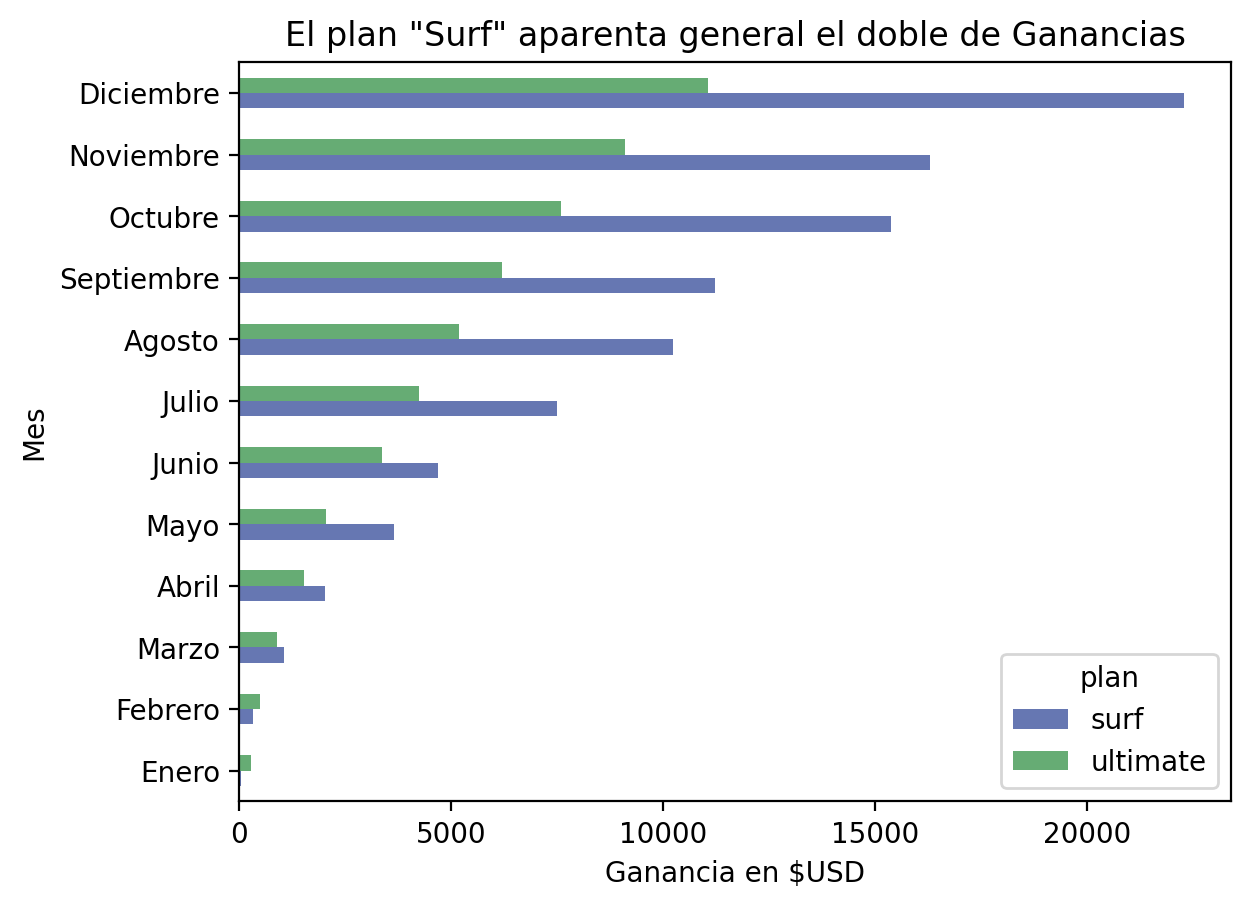

In [47]:
pivot_5 = df_bill.pivot_table(
    index = 'month',
    columns = 'plan',
    values = 'total_usd',
    aggfunc = 'sum'
)
nombres_mes = month_names_map = {pd.Period('2018-01', freq='M'): 'Enero',pd.Period('2018-02', freq='M'): 'Febrero',pd.Period('2018-03', freq='M'): 'Marzo',pd.Period('2018-04', freq='M'): 'Abril',
    pd.Period('2018-05', freq='M'): 'Mayo',
    pd.Period('2018-06', freq='M'): 'Junio',
    pd.Period('2018-07', freq='M'): 'Julio',
    pd.Period('2018-08', freq='M'): 'Agosto',
    pd.Period('2018-09', freq='M'): 'Septiembre',
    pd.Period('2018-10', freq='M'): 'Octubre',
    pd.Period('2018-11', freq='M'): 'Noviembre',
    pd.Period('2018-12', freq='M'): 'Diciembre',
}
pivot_5 = pivot_5.rename(index = nombres_mes)
pivot_5.plot(
    kind = 'barh',
    alpha = 0.6,
)
plt.xlabel('Ganancia en $USD')
plt.ylabel('Mes')
plt.title('El plan "Surf" aparenta general el doble de Ganancias')
plt.show()


In [48]:
media_ingreso_surf = pivot_5['surf'].mean()
var_ingreso_surf = pivot_5['surf'].var()
media_ingreso_ultimate = pivot_5['ultimate'].mean()
var_ingreso_ultimate = pivot_5['ultimate'].var()
print(f'La media plan "Surf"{media_ingreso_surf} y su varianza {var_ingreso_surf}')
print(f'La media plan "Ultimate"{media_ingreso_ultimate} y su varianza {var_ingreso_ultimate}')
print('Hipotesis nula: El plan "Surf" genera mayores ganancias que el plan "Ultimate".')

La media plan "Surf"7888.995833333334 y su varianza 52668961.77226288
La media plan "Ultimate"4333.0 y su varianza 12722591.636363637
Hipotesis nula: El plan "Surf" genera mayores ganancias que el plan "Ultimate".


In [49]:
prueba_ingreso = st.mannwhitneyu(pivot_5['surf'], pivot_5['ultimate'], alternative = 'greater')
print(f'El valor-p es: {prueba_ingreso.pvalue}')
if prueba_ingreso.pvalue < 0.05:
    print('Rechazamos la hipotesis nula, plan "Surf" genera mayores ingresos.')
else:
    print('No podemos rechazar la hipotesis nula')

El valor-p es: 0.1703893067814773
No podemos rechazar la hipotesis nula


<div class="alert alert-block alert-info">
<b>
    
- Conclusion: El consumo excedido de los usuarios 'surf' podria ser la causa de las ganancias altas con respecto con los usuarios 'ultimate'.

- Conclusion: Estadisticamente no se demuestra que los usuarios 'surf' generen mayor ganancia que los usuario 'ultimate'.

- Conclusion: Sin embargo, aparentemente hay diferencia entre ambos planes dada la media y varianza de ambas ganancias para cada plan respectivamente.
</b> <a class=“tocSkip”></a>
</div>

## Prueba las hipótesis estadísticas

**NOTA**

*Para esta prueba estadistica no se utilizo la prueba de Levene para evaluar similitud de varianzas debido a que se asumio igualdad.*

In [50]:
# Prueba las hipótesis
# Una prueba similar la hice en el paso anterior, pero dado que se desea comparar medias ocupare la T-Test en lugar de mannwhitney que se enfoca en medianas
print('Hipotesis nula, la ganancia recibida en promedio por usuarios "Surf" no es mayor que aquella que recibimos por usuarios "Ultimate"')
prueba_ingreso_media = st.ttest_ind(pivot_5['surf'],pivot_5['ultimate'], equal_var = False, alternative = 'greater')
print(f'El valor-p es: {prueba_ingreso_media.pvalue}')
if prueba_ingreso_media.pvalue < 0.05:
    print('Rechazamos la hipotesis nula, en efecto la ganancia que recibimos es mayor cuando se tata de usuairos "Surf"')
else:
    print('No podemos rechazar hipotesis nula')

Hipotesis nula, la ganancia recibida en promedio por usuarios "Surf" no es mayor que aquella que recibimos por usuarios "Ultimate"
El valor-p es: 0.07358625965062934
No podemos rechazar hipotesis nula


In [51]:
# Prueba las hipótesis

df_complemento = df_total[['user_id','city']]
df_ultimo = df_bill.merge(df_complemento, on = 'user_id', how = 'left')
#display(df_ultimo.head(1))
#print(sorted(df_ultimo['city'].unique()))
grupo_1_cities = df_ultimo[df_ultimo['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']
grupo_2_rest_regions = df_ultimo[~(df_ultimo['city']== 'New York-Newark-Jersey City, NY-NJ-PA MSA')]

grupo_1_serie = grupo_1_cities.groupby(by = 'month')['total_usd'].sum()
grupo_2_serie = grupo_2_rest_regions.groupby(by = 'month')['total_usd'].sum()
alpha = 0.05
print('Hipotesis nula: Los ganancias promedio de la region (NY-NJ) no son diferentes de el resto de regiones.')
prueba_regiones = st.ttest_ind(grupo_1_serie,grupo_2_serie, equal_var = False)
print(f'El valor-p es: {prueba_regiones.pvalue}')
if prueba_regiones.pvalue < alpha:
    print('Rechazamos la hipotesis nula, la media SI es diferente')
else:
    print('No rechazamos la hipotesis nula')

Hipotesis nula: Los ganancias promedio de la region (NY-NJ) no son diferentes de el resto de regiones.
El valor-p es: 0.0018693585688747277
Rechazamos la hipotesis nula, la media SI es diferente


## Conclusión general

    1. Se recopilo toda la informacion en un dataframe completo para poder hacer un analisis preciso.
    2. Se omitieron datos como la edad puesto que para este trabajo no fueron necesarios.
    3. Las graficas demostraban constraste en la mayoria de las variables. Sin embargo solo una de todas las hipotesis alternativas se demostro correcta (estadisticamente).
    4. Dado el tamaño de la muestra podriamos re evaluar con mas datos, acercandonos mas a la poblacion para hacer comparaciones de (media) mas precisas.
    5. Con lo anterior podriamos estar mas seguros si algun plan consume mas o menos. De igual manera para los ingresos.
    6. Por el momento la conclusion mas segura es admitir que ambos planes cumplen con una media similar tanto en consumo como en ingresos economicos.
    7. Una seleccion de muestra mas grande podria cambiar esto.
    8. Mejorar la publicidad en paquetes como surf podria elevar aun mas sus valores, lo que puede llevar a una diferencia estadistica mayor en ganancia.